# The Sparks Foundation

Task 1: Prediction Using Supervised ML

Author: Aditi Singh

Objective: In this regression task we will pridict the percentage of marks that a student is expected to score based upon the number of hours the student has studied. This is a simple linear regression task as it involves just two variables.

### Importing required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Reading Data:

In [22]:
data =  pd.read_csv('http://bit.ly/w-data')
print("Data has been succesfully imported!")
data

Data has been succesfully imported!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [23]:
data.shape

(25, 2)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [25]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### NO NULL values in the dataset

### Visualising Data:

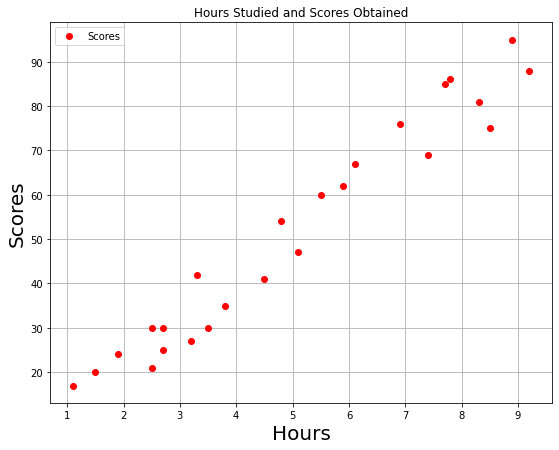

In [27]:
data.plot(x='Hours',y='Scores',style='ro',c='red', figsize=(9,7))
plt.title('Hours Studied and Scores Obtained')
plt.xlabel('Hours', size=20)
plt.ylabel('Scores',size=20)
plt.grid()
plt.show()

In [28]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Data Preprocessing

In [30]:
x=np.array(data[['Hours']])
y=np.array(data[['Scores']])

### Training Data And Testing Data:

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_train)

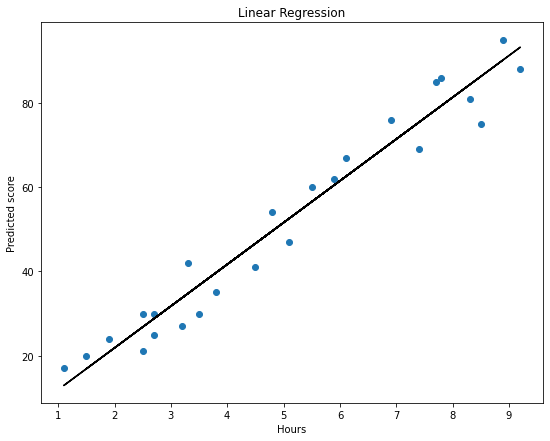

In [37]:
yhat = model.intercept_ + model.coef_ * x
plt.figure(figsize=(9,7))
plt.scatter(x,y)
plt.plot(x,yhat, color='black')
plt.title('Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Predicted score')
plt.show()

In [43]:
print(x_test)
y_pred = model.predict(x_test.reshape(-1,1))

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [80]:
print(y_test)

[[20]
 [27]
 [69]
 [30]
 [62]]


In [91]:
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


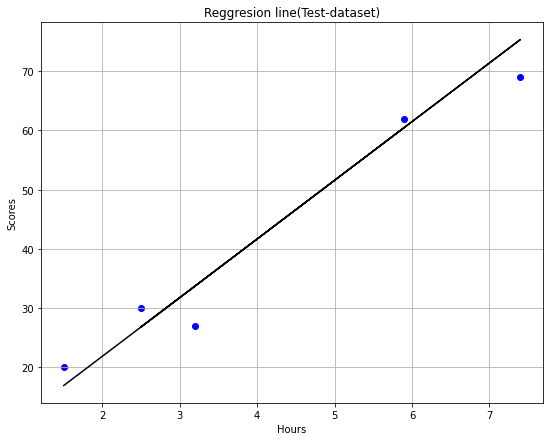

In [47]:
yhat2 = model.intercept_ + model.coef_ * x_test.reshape(-1,1)
plt.figure(figsize=(9,7))
plt.scatter(x_test.reshape(-1,1),y_test,color='blue')
plt.plot(x_test.reshape(-1,1),yhat2,color='black')
plt.title('Reggresion line(Test-dataset)')  
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.grid()

What will be predicted score if a student studies for 9.25 hrs/ day?

In [84]:
print('Predicted score:-',model.predict([[9.25]]))

Predicted score:- [[93.69173249]]


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [85]:
#Estimating training and test score
print("Training Score:",model.score(x_train.reshape(-1,1),y_train))
print("Test Score:",model.score(x_test.reshape(-1,1),y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105355


In [87]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.18385989900298
Mean Squared Error: 21.598769307217413
Root Mean Squared Error: 4.647447612100368
